In [ ]:
"""
Created on Wednesday, May 16 2023

@Author: Grady Robbins
"""
#Data plotting for classification results

In [18]:
import numpy as np
import pandas as pd
import math
import re
import csv

beta_classifications = r'C:\Users\Gradondosaurus Rex\Documents\Cool Neighbors Main\Cool Neighbors\Cool_Neighbors_Beta_Accuracy\beta_workflow-classifications (1) (1).csv'
beta_targets = r'C:\Users\Gradondosaurus Rex\Documents\Cool Neighbors Main\Cool Neighbors\Cool_Neighbors_Beta_Accuracy\beta_targets_final.csv'
coord_data = np.loadtxt(beta_targets,delimiter=',',usecols=(0,1)).astype(float)
beta_class_text = open(beta_classifications, "r")
beta_target_text = open(beta_targets, 'r')

RA = coord_data[:,0]
DEC = coord_data[:,1]
#define type of targets ,here 2^0,2^1,2^2,2^3,2^4,2^5 used
typeRA = {'1':[],'2':[],'4':[],'8':[],'16':[]}
typeDEC = {'1':[],'2':[],'4':[],'8':[],'16':[]}

#separate RA and DEC by target type
for line in beta_target_text:
    linesplit = re.split(',',line)
    for i in range(5):
        if str(2**i)+'\n' in linesplit[2]:
            typeRA[str(2**i)].append(str(linesplit[0]))
            typeDEC[str(2**i)].append(str(linesplit[1]))

type_presence = 0
typedata = {'1':[],'2':[],'4':[],'8':[],'16':[]}
patterntype = {'1':'"#Type"":""1"','2':'"#Type"":""2"','4':'"#Type"":""4"','8':'"#Type"":""8"','16':'"#Type"":""16"'}
#separate data by target type and remove bad IDs

final_counter = 0
bad_ID = [78412786,78412838,78517043,78517056,79925646,79925663,78412820,78517052,79925658] # this ID should not be counted. as the targets are not verified
for line in beta_class_text:
    if re.search(patterntype['1'], line):
        typedata['1'].append(line)
    if re.search(patterntype['2'], line):
        typedata['2'].append(line)
    if re.search(patterntype['4'], line):
        p = 0
        for n in range(len(bad_ID)):
            if str(bad_ID[n]) in line:
                p = 1
        if p != 1:
            typedata['4'].append(line)
    if re.search(patterntype['8'], line):
        typedata['8'].append(line)
    if re.search(patterntype['16'], line):
        typedata['16'].append(line)

move_count = {'1':0,'2':0,'4':0,'8':0,'16':0}
nomove_count = {'1':0,'2':0,'4':0,'8':0,'16':0}
for i in range(5):
    for l in range(len(typedata[str(2**i)])):
        if "Yes" in typedata[str(2**i)][l]:
            move_count[str(2**i)] +=1
        if "No" in typedata[str(2**i)][l]:
            nomove_count[str(2**i)] +=1
    for l in range(len(typedata[str(2**i)])):
        for k in range(len(RA)):
            if str(int(RA[k])) in typedata[str(2**i)][l] and str(int(DEC[k])) in typedata[str(2**i)][l]:
                final_counter +=1
                break
        for k in range(len(typeRA[str(2**i)])):
            if typeRA[str(2**i)][k] in typedata[str(2**i)][l] and typeDEC[str(2**i)][k] in typedata[str(2**i)][l]:
                type_presence +=1
                break
#difficulty data
difficultyID_group = {'easy':[],'medium':[],'difficult':[]}
text_file_dim = open(r"C:\Users\Gradondosaurus Rex\Documents\Cool Neighbors Main\Cool Neighbors\Cool_Neighbors_Beta_Accuracy\type4dimmness.csv", "r")
for line_dim in text_file_dim:
    for i in ['easy','medium','difficult']:
        if i in line_dim:
            diff_data = re.split(',',line_dim)
            diff_data = diff_data[-1]
            difficultyID_group[i].append(diff_data)

difficultyID= {'easy':[],'medium':[],'difficult':[]}
for i in ['easy','medium','difficult']:
    for k in range(len(difficultyID_group[i])):
        length = re.split(' ',difficultyID_group[i][k])[:-1]
        for n in range(len(length)):
            difficultyID[i].append(length[n])

difficulty_true = {'easy' : 0,'medium' : 0,'difficult' : 0}
difficulty_false = {'easy' : 0,'medium' : 0,'difficult' : 0}
beta_class_text = open(beta_classifications, "r")
for line_BD in beta_class_text:
    for i in ['easy','medium','difficult']:
        for k in range(len(difficultyID[i])):
            if difficultyID[i][k] in line_BD:
                if 'Yes' in line_BD:
                    difficulty_true[i] +=1
                if 'No' in line_BD:
                    difficulty_false[i]+=1

Text(0, 0.5, 'number of targets')

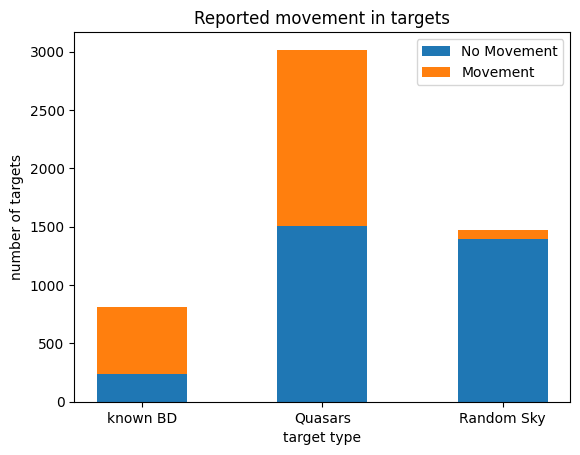

In [20]:
import matplotlib.pyplot as plt

types = ('known BD','Quasars','Random Sky')
weight_counts = {
    "No Movement": (nomove_count['4'],nomove_count['8'],nomove_count['16']),
    "Movement": (move_count['4'],nomove_count['8'],move_count['16']),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(types, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Reported movement in targets")
ax.legend(loc="upper right")
plt.xlabel('target type')
plt.ylabel('number of targets')
#plt.savefig(r'Cool_Neighbors_Beta_Accuracy\Movement_bar_Betareduced.png',dpi=300)
#plt.close()


Text(0, 0.5, 'number of classifications')

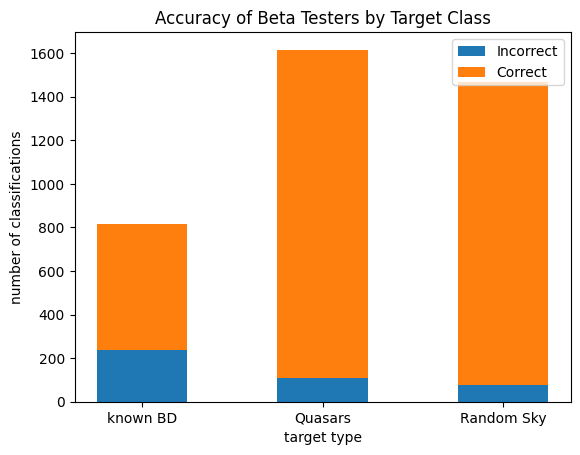

In [21]:

types = ('known BD','Quasars','Random Sky')
weight_counts = {
    "Incorrect": (nomove_count['4'],move_count['8'],move_count['16']),
    "Correct": (move_count['4'],nomove_count['8'],nomove_count['16']),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(types, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Accuracy of Beta Testers by Target Class")
ax.legend(loc="upper right")
plt.xlabel('target type')
plt.ylabel('number of classifications')
#plt.savefig(r'Cool_Neighbors_Beta_Accuracy\Accuracy_bar_Betareduced.png',dpi=300)
#plt.close()

total accuracy of 89.12%


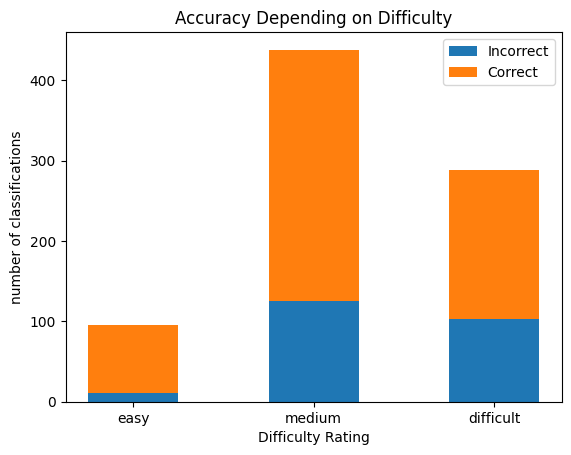

In [36]:

difficulty = ('easy','medium','difficult')
weight_counts = {"Incorrect": (difficulty_false['easy'],difficulty_false['medium'],difficulty_false['difficult']),"Correct": (difficulty_true['easy'],difficulty_true['medium'],difficulty_true['difficult']),}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    pp = ax.bar(difficulty, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Accuracy Depending on Difficulty")
ax.legend(loc="upper right")
plt.xlabel('Difficulty Rating')
plt.ylabel('number of classifications')
#plt.text(0.1,2,str(int(difficulty_true['easy']/(difficulty_false['easy']+difficulty_true['easy'])*100))+'%')
#plt.text(0.5,0.5,str(int(difficulty_true['medium']/(difficulty_false['medium']+difficulty_true['medium'])*100))+'%')
#plt.text(0.5,0.5,str(int(difficulty_true['difficult']/(difficulty_false['difficult']+difficulty_true['difficult'])*100))+'%')

#plt.savefig(r'Cool_Neighbors_Beta_Accuracy\Difficulty_Accuracy_Beta.png',dpi=300)

#plt.close()
print('total accuracy of 89.12%')